In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Headsize-Brainweight.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
df.keys()

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [7]:
df.shape

(237, 4)

In [9]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [10]:
df.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [11]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

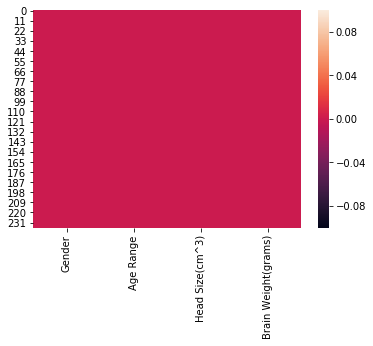

In [12]:
sns.heatmap(df.isnull())

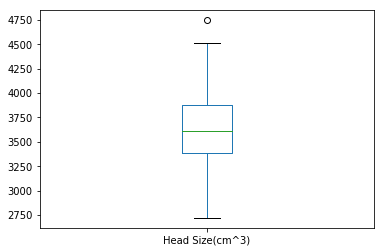

In [15]:
df['Head Size(cm^3)'].plot.box()

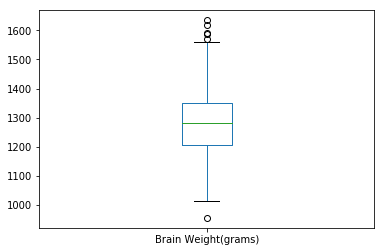

In [16]:
df['Brain Weight(grams)'].plot.box()

In [17]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


Gender                    AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Age Range              AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Head Size(cm^3)        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Brain Weight(grams)    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

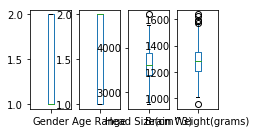

In [18]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [19]:
#Removing outliers and Finding Z-Score values()
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

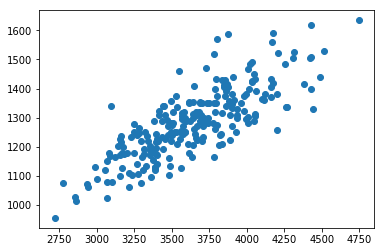

In [20]:
plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])
plt.show()

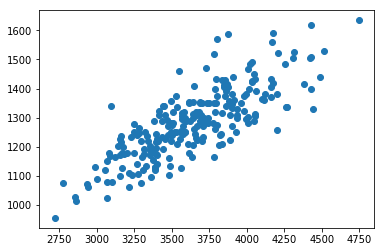

In [21]:
x=df['Head Size(cm^3)']
y=df['Brain Weight(grams)']
plt.scatter(x,y)
plt.show()

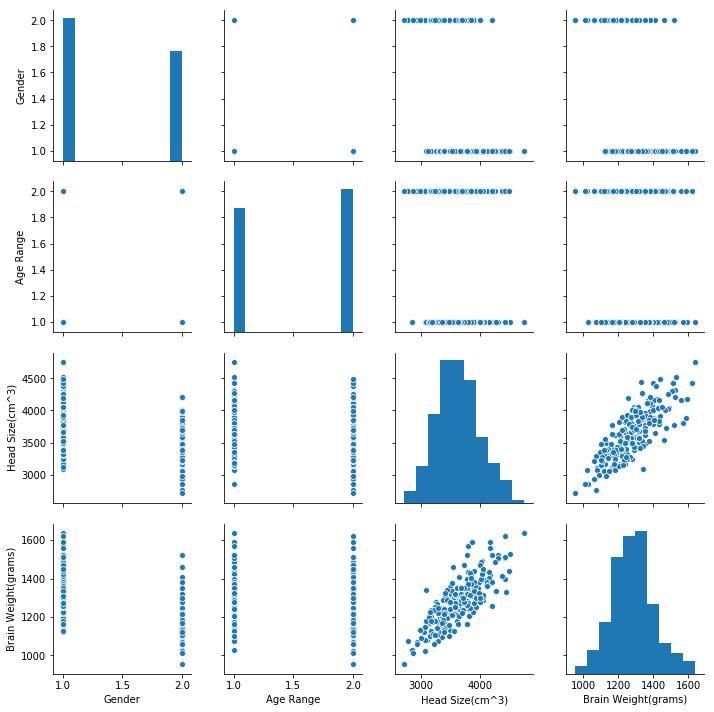

In [22]:
sns.pairplot(df)

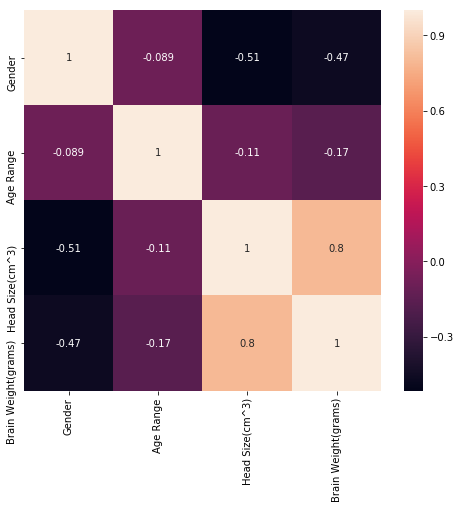

In [23]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [24]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [26]:
df.shape

(237, 4)

In [27]:
df_new.shape

(236, 4)

In [28]:
x=df.iloc[:,0:-1]
x.head()

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [29]:
y=df.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

In [30]:
x.shape

(237, 3)

In [31]:
y.shape

(237,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [33]:
x_train.shape

(158, 3)

In [34]:
y_train.shape

(158,)

In [35]:
x_test.shape

(79, 3)

In [36]:
y_test.shape

(79,)

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lm.coef_

array([-16.5338319 , -12.99553458,   0.25142448])

In [40]:
lm.intercept_

412.7934199274896

In [41]:
lm.score(x_train,y_train) 

0.6681564381083898

In [42]:
#predict the values

pred=lm.predict(x_test)
print("Predicted result :",pred)
print("brain weight:",y_test)

Predicted result : [1284.62080512 1182.68118913 1262.49545111 1358.28817702 1268.10532786
 1285.01095146 1284.75952698 1338.25275707 1160.72872134 1248.91852932
 1342.19701046 1198.52093121 1169.85854078 1234.39609324 1207.06936344
 1264.83680965 1209.08075926 1517.69129572 1414.85868444 1281.99385773
 1264.56703053 1487.09604772 1344.78979348 1092.6712262  1244.72285145
 1298.76075947 1247.73994518 1357.78532806 1384.43632267 1292.24207769
 1294.06223264 1183.35692432 1346.72265105 1250.00276548 1429.44130414
 1339.68276568 1379.40783312 1495.31451723 1163.99723955 1147.15179956
 1398.01324445 1179.02252459 1468.16067366 1439.57682148 1162.81865541
 1269.61387472 1197.01238435 1177.65269958 1332.89430479 1291.99065322
 1206.31509001 1245.9616192  1322.8975093  1471.7591546  1387.53195465
 1280.73673534 1342.27554871 1321.97034964 1359.62383765 1441.25825458
 1397.5103955  1347.03425914 1138.85479181 1331.71572065 1323.08875017
 1270.03818543 1215.55761207 1224.8419631  1498.66157368 1